# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [112]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal #frequency analysis

In [18]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [19]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [20]:
# Create a Beautiful Soup Object
html = browser.html
marsdata = soup(html, "html.parser")

In [21]:
# Extract all rows of data
wholetable = marsdata.find("tbody")
wholetable

<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
marstable = {}
columnheader = []

In [22]:
columnheader = [h.text for h in wholetable.find_all("th")]
print(columnheader)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [28]:
#wholetable.find_all("tr", class_="data-row")

In [30]:
for row in wholetable.find_all("tr", class_="data-row"):
    #print([r.text for r in row.find_all("td")])
    marstable.append([r.text for r in row.find_all("td")])

#marstable
marsdb = pd.DataFrame(marstable, columns = columnheader)
marsdb

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
7463,1889,2018-02-23,1973,133,5,-78.0,730.0
7464,1892,2018-02-24,1974,134,5,-77.0,729.0
7465,1894,2018-02-25,1975,134,5,-76.0,729.0
7466,1893,2018-02-26,1976,135,5,-77.0,728.0


In [45]:
len(list(marsdb["id"]))

7468

In [49]:
len(marsdb["id"].unique())

1867

In [50]:
len(marsdb["terrestrial_date"].unique())

1867

In [51]:
len(marsdb["sol"].unique())

1867

In [53]:
marsdb.groupby("id").count()

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
10,4,4,4,4,4,4
100,4,4,4,4,4,4
1000,4,4,4,4,4,4
1001,4,4,4,4,4,4
1002,4,4,4,4,4,4
...,...,...,...,...,...,...
995,4,4,4,4,4,4
996,4,4,4,4,4,4
997,4,4,4,4,4,4


In [55]:
marsdb.groupby("sol").count()

,id,terrestrial_date,ls,month,min_temp,pressure
sol,,,,,,
10,4,4,4,4,4,4
11,4,4,4,4,4,4
12,4,4,4,4,4,4
13,4,4,4,4,4,4
14,4,4,4,4,4,4
...,...,...,...,...,...,...
1973,4,4,4,4,4,4
1974,4,4,4,4,4,4
1975,4,4,4,4,4,4


In [58]:
marsdb = marsdb.drop_duplicates()
marsdb

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
# Create an empty list
# Loop through the scraped data to create a list of rows

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

In [29]:
# Confirm DataFrame was created successfully

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [59]:
# Examine data type of each column
marsdb.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [60]:
# Change data types for data analysis
marsdb["terrestrial_date"] = pd.to_datetime(marsdb["terrestrial_date"])
marsdb["sol"] = marsdb["sol"].astype("int")
marsdb["ls"] = marsdb["ls"].astype("int")
marsdb["month"] = marsdb["month"].astype("int")
marsdb["min_temp"] = marsdb["min_temp"].astype("float")
marsdb["pressure"] = marsdb["pressure"].astype("float")

/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_75155/2152584143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marsdb["terrestrial_date"] = pd.to_datetime(marsdb["terrestrial_date"])
/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_75155/2152584143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marsdb["sol"] = marsdb["sol"].astype("int")
/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_75155/2152584143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

In [61]:
marsdb.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [40]:
# Confirm type changes were successful by examining data types again

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [87]:
# 1. How many months are there on Mars?

In [71]:
monthcount = marsdb.groupby("month").count()["id"]
monthcount

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64

In [86]:
# 2. How many Martian days' worth of data are there?

In [68]:
marsdb["id"].count()

1867

The data contains 1867 Martian days' worth of data.

In [72]:
# 3. What is the average low temperature by month?

In [100]:
mintemp = marsdb.groupby("month").mean()["min_temp"]
mintemp

/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_75155/435716390.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mintemp = marsdb.groupby("month").mean()["min_temp"]


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [101]:
# Plot the average temperature by month

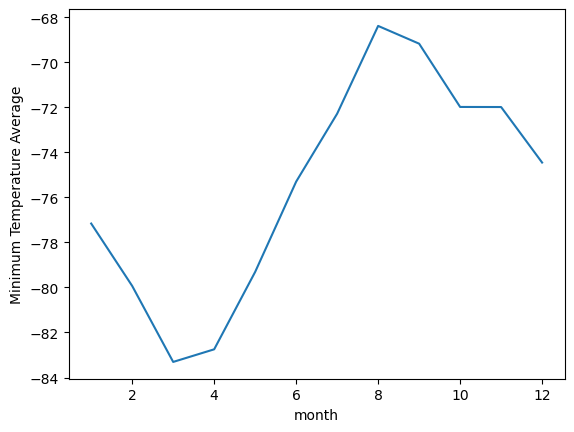

In [103]:
mintemp.plot(kind="line", ylabel="Minimum Temperature Average")
plt.show()

In [85]:
# Identify the coldest and hottest months in Curiosity's location

In [78]:
mintemp = mintemp.sort_values()
mintemp

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

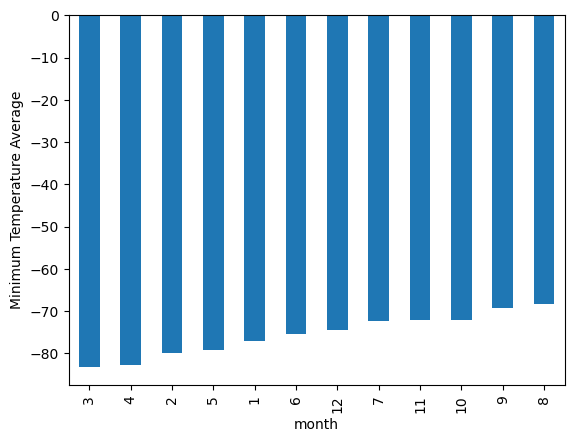

In [84]:
tempplot = mintemp.plot(kind="bar", ylabel="Minimum Temperature Average")
plt.show()

The third month, on average, has the lowest temperature, and the eighth month has the highest.

In [89]:
# 4. Average pressure by Martian month

In [93]:
avgpressure = marsdb.groupby("month").mean()["pressure"].sort_values()
avgpressure

/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_75155/2911118642.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgpressure = marsdb.groupby("month").mean()["pressure"].sort_values()


month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

In [91]:
# Plot the average pressure by month

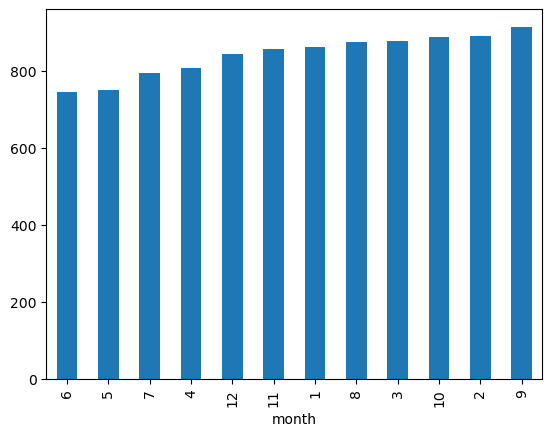

In [94]:
avgpressure.plot(kind="bar")
plt.show()

The sixth month, on average, has the loweset atmospheric pressure, and the nighth month the highest.

In [107]:
# 5. How many terrestrial (earth) days are there in a Martian year?

In [105]:
marsdb["number of terrestrial days"] = range(1,len(marsdb)+1)
marsdb

/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_75155/4162911847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marsdb["number of terrestrial days"] = range(1,len(marsdb)+1)


,id,terrestrial_date,sol,ls,month,min_temp,pressure,number of terrestrial days
0,2,2012-08-16,10,155,6,-75.0,739.0,1
1,13,2012-08-17,11,156,6,-76.0,740.0,2
2,24,2012-08-18,12,156,6,-76.0,741.0,3
3,35,2012-08-19,13,157,6,-74.0,732.0,4
4,46,2012-08-20,14,157,6,-74.0,740.0,5
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,1863
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,1864
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,1865
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,1866


<Axes: xlabel='number of terrestrial days'>

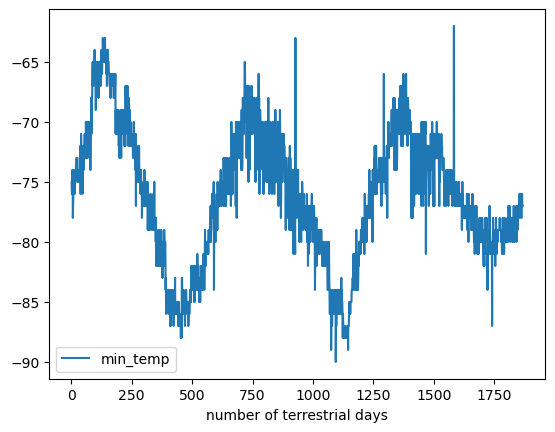

In [108]:
marsdb.plot(kind="line", x="number of terrestrial days", y="min_temp")

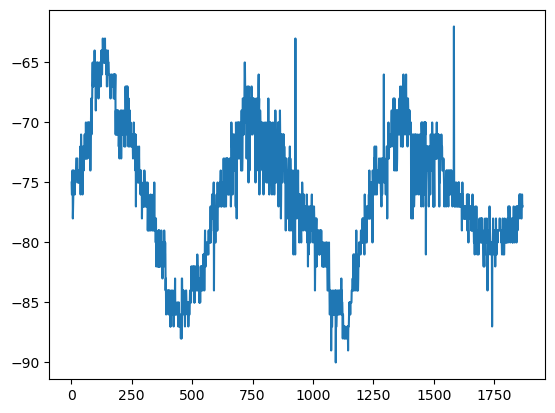

In [106]:
plt.plot(marsdb["number of terrestrial days"], marsdb["min_temp"])

In [115]:
#frequency analysis of the minimum temperature data
#the period of the graph will be the estimated legnth of on Martian year
#assuming the oscillaiton behavior in the graph is a ryhthm presented througout every Martian year
frequencies, power_spectrum = signal.periodogram(marsdb["min_temp"])
domf = frequencies[np.argmax(power_spectrum)]
period = 1 / domf
period

622.3333333333334

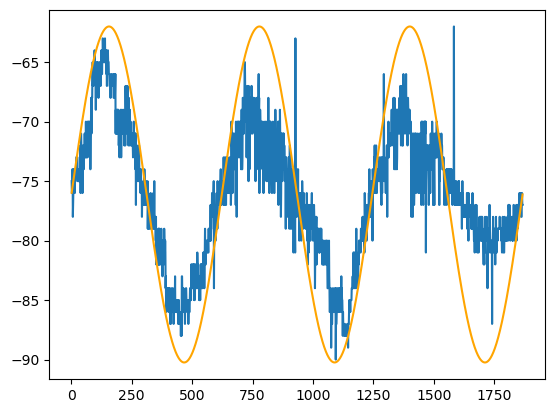

In [122]:
#visually present the wave from where we get the estimated period of the data
amp = np.max(marsdb["min_temp"]) - np.mean(marsdb["min_temp"])
amp

wave = amp * np.sin(domf * 2 * np.pi * marsdb["number of terrestrial days"]) + marsdb["min_temp"].mean()

plt.plot(marsdb["number of terrestrial days"], marsdb["min_temp"])
plt.plot(marsdb["number of terrestrial days"], wave, color="orange")
plt.show()

In [96]:
#estimate the length of a Martian year by analyzing the data in the table directly
#instead of analyzing from the plot
for i in range(len(marsdb)):
    if marsdb.loc[i, "month"]==5 and marsdb.loc[i+1, "month"]==6:
        print(marsdb.loc[i, "terrestrial_date"]-marsdb.loc[1, "terrestrial_date"])
        break

674 days 00:00:00


From the kind of analyses performed, the length of a Martian year is roughly between 622-674 terrestrial days.

Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [123]:
# Write the data to a CSV
marsdb.to_csv("mars_weather_data.csv")

In [124]:
browser.quit()